# `Plotting with a Series`

* Inspecting statistical summaries and tables can reveal much about your data
* Pandas has native integration with Matplotlib
* Tell Jupyter to display the plots in the browser: use %matplotlib inline


In [14]:
import pandas as pd
%matplotlib inline

In [15]:
url ='https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

In [16]:
alta_df = pd.read_csv(url)

In [17]:
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dates=pd.to_datetime(alta_df.DATE)

In [26]:
alta_df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')

In [28]:
alta_df.SNOW

0        2.0
1        3.0
2        1.0
3        0.0
4        0.0
        ... 
14155    0.0
14156    0.0
14157    0.0
14158    0.0
14159    0.0
Name: SNOW, Length: 14160, dtype: float64

In [32]:
snow=(alta_df
      .SNOW
      .rename(dates)
     )

In [33]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [51]:
snow[snow.index.month==1]

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-01-27    0.0
2019-01-28    0.0
2019-01-29    0.0
2019-01-30    0.0
2019-01-31    0.0
Name: SNOW, Length: 1229, dtype: float64

### `Histograms`
continuous numeric data

<Axes: ylabel='Frequency'>

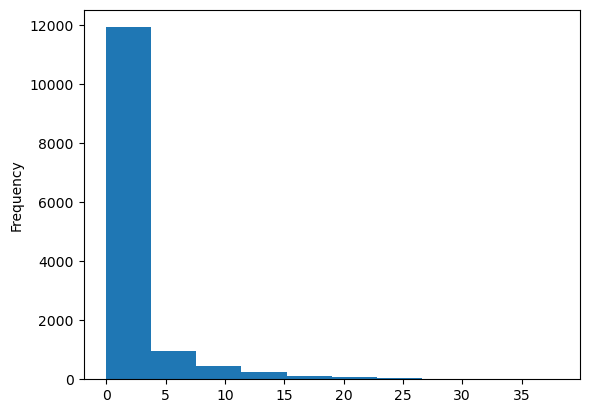

In [34]:
snow.plot.hist()

<Axes: title={'center': 'Chart'}, ylabel='Frequency'>

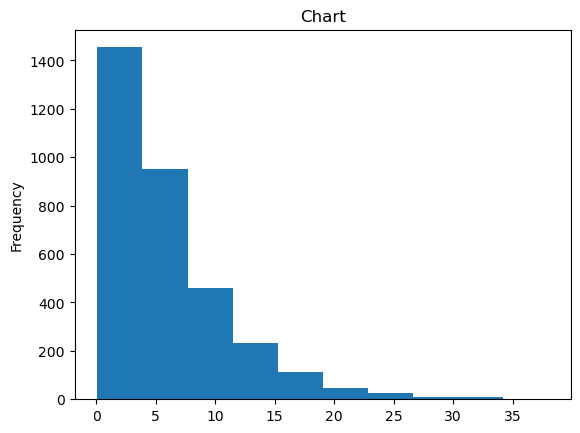

In [43]:
# bins=20: 
# The bins parameter specifies the number of bins (intervals) that the data will be divided into. In this case, it's set to 20, meaning the histogram will have 20 bars.
snow[snow>0].plot.hist(bins=10, title="Chart")

### ` Box Plot`
view the distribution of the data.

<Axes: >

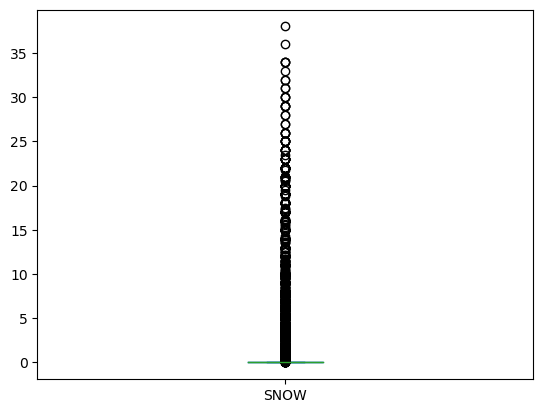

In [44]:
snow.plot.box()

<Axes: >

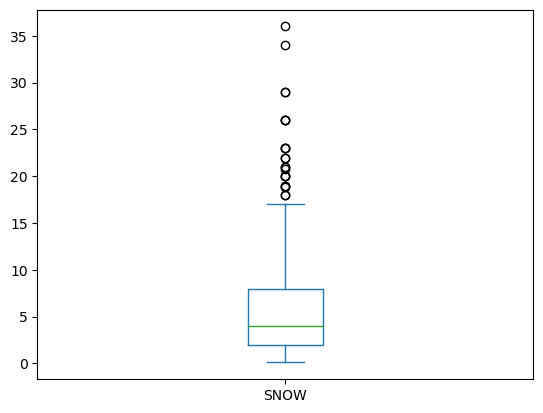

In [72]:
# snow amounts during January (ignoring zero):
snow[(snow.index.month==1) &(snow>0)].plot.box()

### `Line Plots`


<Axes: >

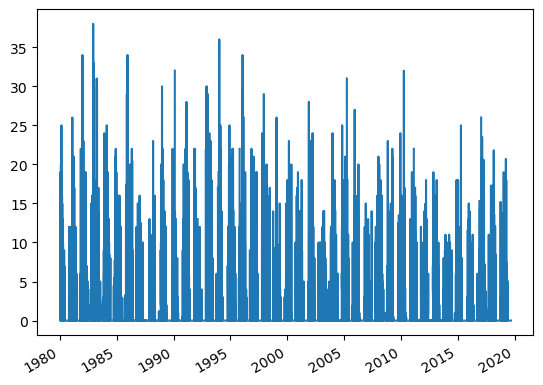

In [73]:
snow.plot.line()

In [79]:
snow.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2019-08-29', '2019-08-30', '2019-08-31', '2019-09-01',
               '2019-09-02', '2019-09-03', '2019-09-04', '2019-09-05',
               '2019-09-06', '2019-09-07'],
              dtype='datetime64[ns]', length=14160, freq=None)

<Axes: >

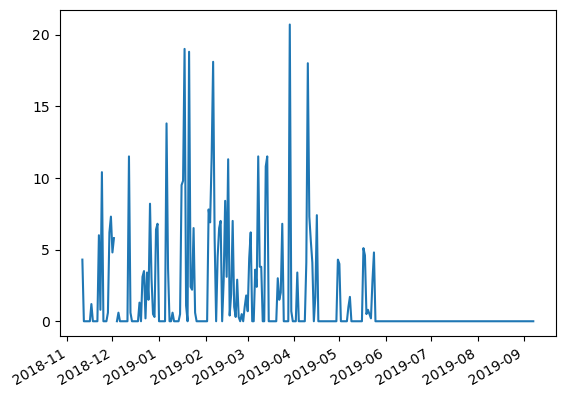

In [93]:
# pull off the last 300 values
snow.iloc[-300:].plot.line()

<Axes: >

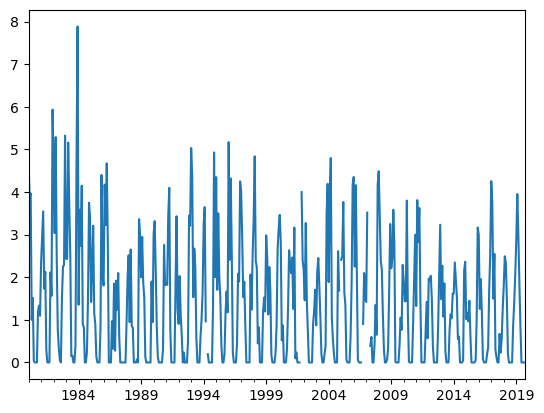

In [96]:
# aggregate at the monthly level and look at the mean snowfall using .resample
# with the 'M' offset alias and the .mean aggregation method:

(snow
 .resample('M')
 .mean()
 .plot.line()
)

### `Bar Plots`
These are useful for comparing values

In [97]:
#  the percent of snow that fell during each month:
season2016=(snow.loc['2016-10': '2017-05'])

<Axes: >

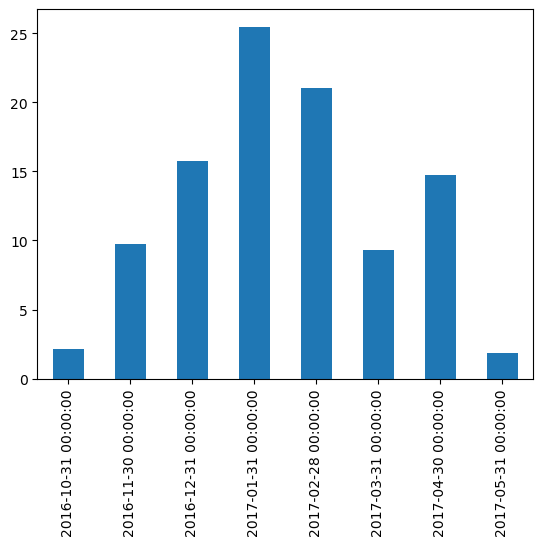

In [105]:
(season2016
 .resample('M')
 .sum()
 .div(season2016.sum())
 .mul(100)
 .plot.bar()
)

<Axes: >

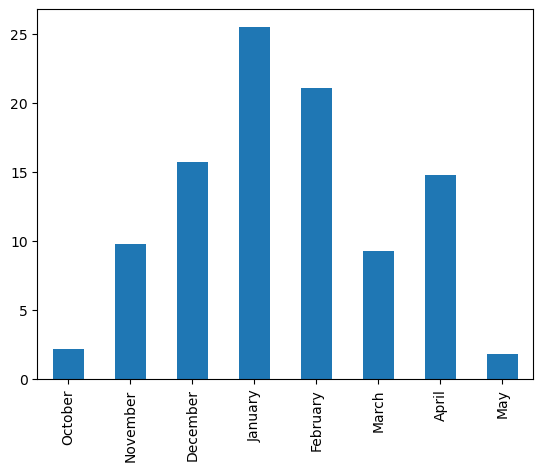

In [126]:
#lambda idx: idx.month_name(): This is an anonymous (lambda) function that takes an index label (idx) and returns the name of the month associated with that index label.
(season2016
 .resample('M')
 .sum()
 .div(season2016.sum())
 .mul(100)
 .rename(lambda s: s.month_name())
 .plot.bar()
)

<Axes: >

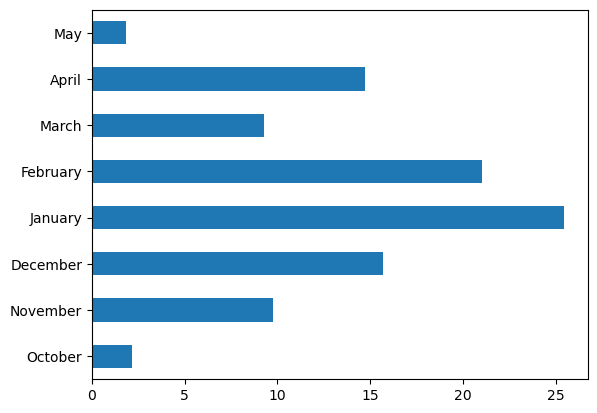

In [128]:
# Create a horizontal bar plot with the .barh method:
(season2016
 .resample('M')
 .sum()
 .div(season2016.sum())
 .mul(100)
 .rename(lambda s: s.month_name())
 .plot.barh()
)

### `Pie Plot`


<Axes: ylabel='SNOW'>

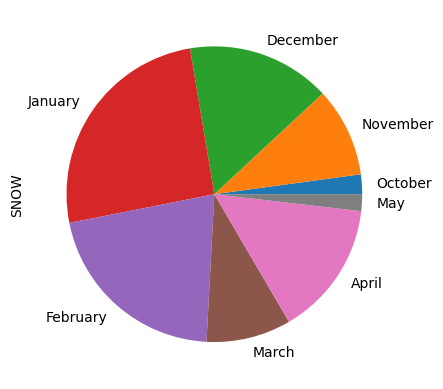

In [129]:
(season2016
 .resample('M')
 .sum()
 .div(season2016.sum())
 .mul(100)
 .rename(lambda s: s.month_name())
 .plot.pie()
)

In [ ]:
# Seaborn library to set the font and color palette before plotting
